In [1]:
import gensim.downloader as api
from gensim.models import KeyedVectors

wv: KeyedVectors = api.load('word2vec-google-news-300')

In [2]:
positive_words = [
    'USTC',
    'university',
    'China',
    'Hefei',
    'Zhou_Yi',
    'professor',
    'Quantum_Mechanics',
    'Computer_Science',
    'GPA',
    'single',
    'gay',
    'homosexual',
]
negative_words = [
    'Elon_Musk',
    'Minecraft',
    'Roquefort',
    'anime',
    'dinner',
    'cop',
    'daddy',
]
positive_vectors = [wv[word] for word in positive_words]
negative_vectors = [wv[word] for word in negative_words]

In [3]:
for word in positive_words:
    print(f'word: {word}, most_similar: {wv.most_similar(word)}')
for word in negative_words:
    print(f'word: {word}, most_similar: {wv.most_similar(word)}')

word: USTC, most_similar: [('Yangling', 0.4686923623085022), ('Shi_Feng', 0.4576290249824524), ('NTTF', 0.44924071431159973), ('CSSC', 0.4449201226234436), ('Hua_Lien', 0.4445916712284088), ('Donghua', 0.44281643629074097), ('Jinyong', 0.44050565361976624), ('Zhonghao', 0.4394257664680481), ('CNEC', 0.4379257261753082), ('Digicon', 0.43687155842781067)]
word: university, most_similar: [('universities', 0.7003918886184692), ('faculty', 0.6780907511711121), ('unversity', 0.6758289933204651), ('undergraduate', 0.6587095260620117), ('univeristy', 0.6585438251495361), ('campus', 0.6434986591339111), ('college', 0.638526976108551), ('academic', 0.6317198276519775), ('professors', 0.6298649907112122), ('undergraduates', 0.6149812936782837)]
word: China, most_similar: [('Chinese', 0.7678081393241882), ('Beijing', 0.76484614610672), ('Taiwan', 0.7081156969070435), ('Chinas', 0.689917266368866), ('Shanghai', 0.6727433204650879), ('Guangdong', 0.6721152067184448), ('Hainan', 0.6360340714454651), 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

np.random.seed(666)
tsne = TSNE(n_components=2)
other_vectors = wv.vectors[np.random.choice(len(wv.vectors), 1000)]
vectors_tsne = tsne.fit_transform(
    np.concatenate([positive_vectors, negative_vectors, other_vectors], axis=0)
)

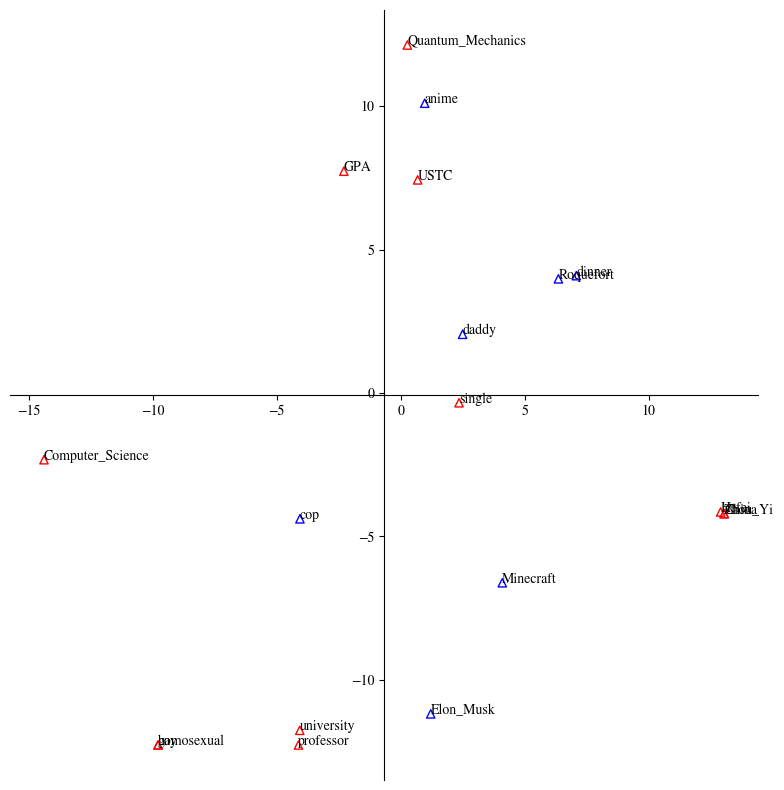

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
positive_slice = slice(0, len(positive_vectors))
negative_slice = slice(
    len(positive_vectors), len(positive_vectors) + len(negative_vectors)
)
ax.scatter(
    vectors_tsne[positive_slice, 0],
    vectors_tsne[positive_slice, 1],
    c='r',
    marker='^',
)
ax.scatter(
    vectors_tsne[negative_slice, 0],
    vectors_tsne[negative_slice, 1],
    c='b',
    marker='^',
)
for i, word in enumerate(positive_words + negative_words):
    ax.annotate(word, (vectors_tsne[i, 0], vectors_tsne[i, 1]))
# ax.axis('off')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
fig.tight_layout()
fig.savefig('word2vec.svg')